<a href="https://colab.research.google.com/github/ariabishma/heart-rate-detector/blob/main/heart_rate_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import sklearn
import math
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from sklearn.decomposition import FastICA

In [ ]:
cap = cv2.VideoCapture('video.mp4')

In [ ]:
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    =  cap.get(cv2.CAP_PROP_FPS)

In [ ]:
face_detector=cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")

Blue Average :  98.25586621719876
Green Average :  108.83944741886444
Red Average :  152.76588009782537


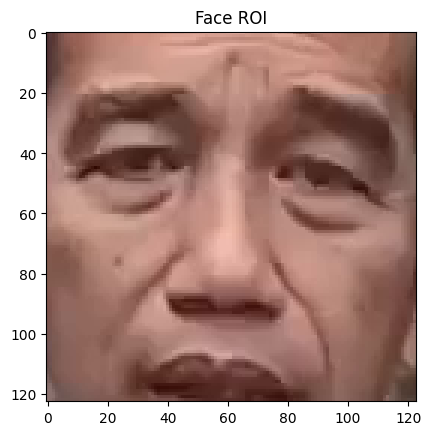

In [ ]:
ret, frame = cap.read()
if ret == True:
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  results = face_detector.detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in results:
    face = frame[y+math.ceil(.15*h):y+h-math.ceil(.15*h), x+math.ceil(.15*w):x+w-math.ceil(.15*w)]
    print("Blue Average : ", np.mean(face[:,:,0]))
    print("Green Average : ", np.mean(face[:,:,1]))
    print("Red Average : ", np.mean(face[:,:,2]))
    plt.title('Face ROI')
    plt.imshow(face[:,:,::-1])

In [ ]:
cap = cv2.VideoCapture('video.mp4')

In [ ]:
b_channel = []
g_channel = []
r_channel = []

In [ ]:
for i in range(int(fps) * 10): # 10 seconds
  ret, frame = cap.read()
  if ret == True:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    results = face_detector.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in results:
      face = frame[y+math.ceil(.15*h):y+h-math.ceil(.15*h), x+math.ceil(.15*w):x+w-math.ceil(.15*w)]
      b_channel.append(np.mean(face[:,:,0]))
      g_channel.append(np.mean(face[:,:,1]))
      r_channel.append(np.mean(face[:,:,2]))

In [ ]:
b_channel = np.array(b_channel)
g_channel = np.array(g_channel)
r_channel = np.array(r_channel)
b_channel.shape

(250,)

In [ ]:
b_norm = (np.array(b_channel) - np.min(b_channel)) / (np.max(b_channel) - np.min(b_channel))
g_norm = (np.array(g_channel) - np.min(g_channel)) / (np.max(g_channel) - np.min(g_channel))
r_norm = (np.array(r_channel) - np.min(r_channel)) / (np.max(r_channel) - np.min(r_channel))

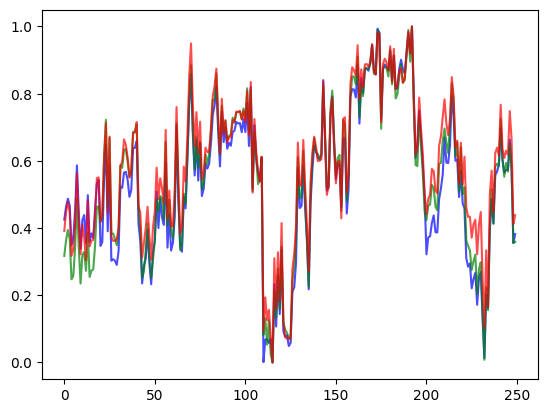

In [ ]:
plt.plot(b_norm,color='b', alpha=.7)
plt.plot(g_norm,color='g', alpha=.7)
plt.plot(r_norm,color='r', alpha=.7)

In [ ]:
transformer = FastICA()
ica = transformer.fit_transform(np.stack((b_norm, g_norm, r_norm), axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [ ]:
b_ica = ica[:,0]
g_ica = ica[:,1]
r_ica = ica[:,2]

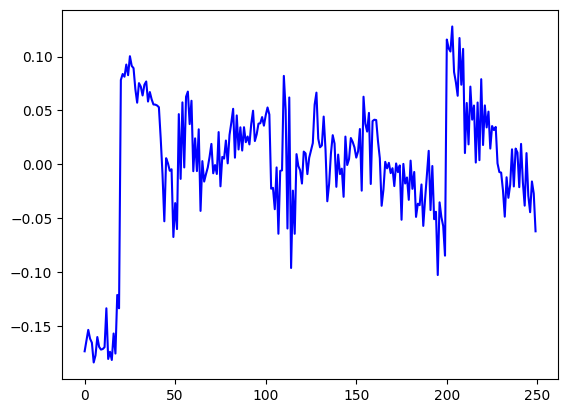

In [ ]:
plt.plot(b_ica, color='b')

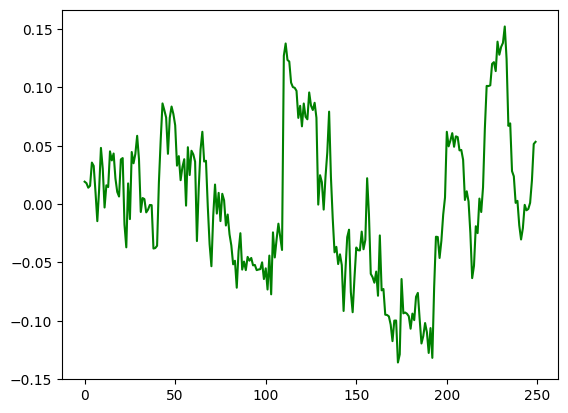

In [ ]:
plt.plot(g_ica, color='g')

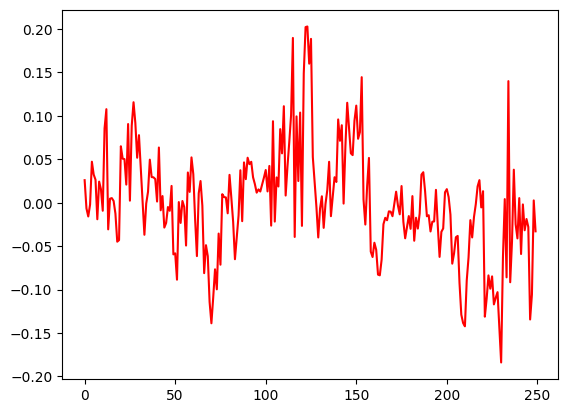

In [ ]:
plt.plot(r_ica, color='r')

In [ ]:
b_ica_fft = fft(b_ica)
g_ica_fft = fft(g_ica)
r_ica_fft = fft(r_ica)

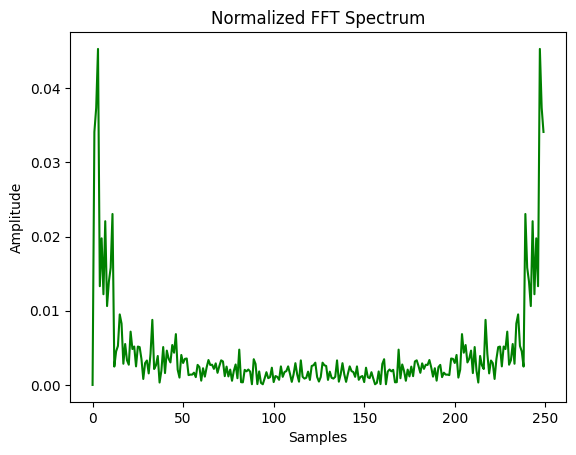

In [ ]:
N = len(g_ica_fft)
normalize = N/2

plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Normalized FFT Spectrum')
plt.plot(np.abs(g_ica_fft)/normalize, color='g')

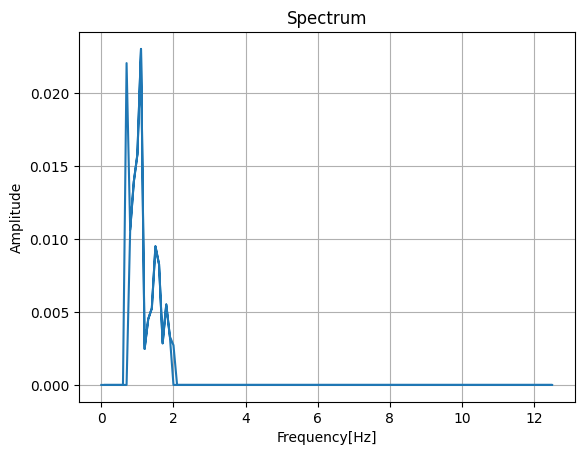

In [ ]:
sampling_rate = 25
frequency_axis = fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(g_ica_fft)/normalize

# Bandpass Filter
bound_low = (np.abs(frequency_axis - .7)).argmin()
bound_high = (np.abs(frequency_axis - 2)).argmin()

norm_amplitude[:bound_low] = 0
norm_amplitude[bound_high:-bound_high] = 0
norm_amplitude[-bound_low:] = 0

plt.plot(np.abs(frequency_axis), norm_amplitude)
plt.grid(1)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


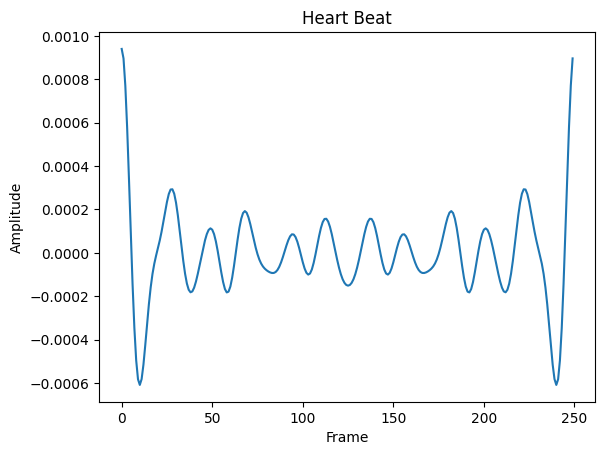

In [ ]:
iff=np.fft.ifft(norm_amplitude, axis=0)
plt.xlabel('Frame')
plt.ylabel('Amplitude')
plt.title('Heart Beat')
plt.plot(iff)